# Apparent fishing hours distribution

In [1]:
import sys
import os
cp = '/home/jupyter-gabriel/' #'I:/My Drive/'
sys.path.append(cp + "projects/suyana")
from scripts.utils.functions import *

In [2]:
# Data primary path
dpp = 'suyana/'
# Data inputs path
dip = 'suyana/inputs/'
# Data features path
dfp = 'suyana/features/'
# Data outputs path
dop = 'suyana/outputs/'
# Data reports path
drp = 'suyana/reports/'
# Data models path
dmp = 'suyana/models/'
# Data displays path
ddp = 'suyana/displays/'
# Data geometries path
dgp = 'suyana/geometries/'

# Read GFW data for Apparent Fishing Hours

In [82]:
df = pd.read_parquet(dip + 'fishing_gfw_daily_2012_2024.parquet')
df['id_vessel'] = df['flag'] + '-' + df['codVessel'].astype(str)
df.head(3)

,lat,lon,date,flag,gearType,codVessel,fishingHours,year,month,id_vessel
index,,,,,,,,,,
0,-12.9,-80.9,2012-11-16,KHM,squid_jigger,1,2.09,2012,11,KHM-1
1,-5.3,-81.2,2012-08-24,PER,purse_seines,1,23.95,2012,8,PER-1
2,-4.8,-81.4,2012-10-13,PER,purse_seines,1,1.78,2012,10,PER-1


In [83]:
# Since original data came in a more granular form
# We decided to round lon, lat values to 2 decimal places
# Therefore, to further clean this data, we will group by these rounded values and aggregate the data

df = df.groupby(['lon', 'lat', 'date', 'flag', 'codVessel', 'id_vessel']).agg(
    apparentFishingHours = ('fishingHours', 'sum'),
).reset_index()

In [84]:
df.query('apparentFishingHours > 24')

,lon,lat,date,flag,codVessel,id_vessel,apparentFishingHours
27,-84.5,-6.3,2016-09-10,CHN,3,CHN-3,31.33
65,-84.4,-6.6,2016-09-11,CHN,3,CHN-3,31.39
463,-83.5,-8.8,2016-09-19,CHN,2,CHN-2,37.02
539,-83.4,-8.9,2016-09-19,CHN,2,CHN-2,24.45
623,-83.3,-9.1,2015-07-07,CHN,5,CHN-5,45.51
...,...,...,...,...,...,...,...
160478,-70.9,-18.3,2024-08-13,PER,7,PER-7,31.36
160629,-70.9,-18.1,2022-08-05,PER,12,PER-12,35.02
161036,-70.6,-18.3,2024-04-24,PER,1,PER-1,30.14
161056,-70.6,-18.3,2024-05-29,PER,1,PER-1,26.80


In [85]:
df.shape

(161130, 7)

In [86]:
df.drop_duplicates(subset=['lon', 'lat', 'date', 'flag', 'codVessel', 'id_vessel']).shape

(161130, 7)

In [88]:
df_final = df.groupby(['lon', 'lat', 'date']).agg(
    apparentFishingHours = ('apparentFishingHours', 'sum'),
    numberVessels = ('id_vessel', 'count'),
).reset_index()

In [89]:
df_final.head(3)

,lon,lat,date,apparentFishingHours,numberVessels
0,-84.7,-4.8,2019-08-31,8.59,1
1,-84.7,-4.7,2019-08-28,3.20,1
2,-84.7,-4.6,2019-08-27,5.27,1


In [91]:
df_final.query('apparentFishingHours > 24 & numberVessels == 1')

,lon,lat,date,apparentFishingHours,numberVessels
27,-84.5,-6.3,2016-09-10,31.33,1
65,-84.4,-6.6,2016-09-11,31.39,1
461,-83.5,-8.8,2016-09-19,37.02,1
534,-83.4,-8.9,2016-09-19,24.45,1
612,-83.3,-9.1,2015-07-07,45.51,1
...,...,...,...,...,...
120785,-71.1,-18.0,2023-05-13,24.04,1
121091,-70.9,-18.3,2024-07-12,25.32,1
121583,-70.6,-18.3,2024-04-24,30.14,1
121603,-70.6,-18.3,2024-05-29,26.80,1


In [94]:
df_final = df_final.sort_values(by=['date','lon', 'lat'], ascending=[True, True, True]).reset_index(drop=True)
df_final

,lon,lat,date,apparentFishingHours,numberVessels
0,-81.6,-3.6,2012-01-31,0.07,1
1,-81.5,-3.9,2012-01-31,1.89,1
2,-81.5,-3.7,2012-01-31,12.73,1
3,-81.7,-3.9,2012-02-01,3.42,1
4,-81.6,-3.6,2012-02-02,1.73,1
...,...,...,...,...,...
121672,-76.3,-13.8,2024-12-31,0.10,1
121673,-71.9,-17.6,2024-12-31,1.09,1
121674,-71.8,-17.6,2024-12-31,1.22,1
121675,-70.6,-18.3,2024-12-31,2.42,1


In [95]:
df_final = df_final.set_index(['date', 'lon', 'lat'])

In [96]:
ds_final = df_final.to_xarray()
ds_final

<xarray.Dataset> Size: 2GB
Dimensions:               (date: 4329, lon: 144, lat: 169)
Coordinates:
  * date                  (date) datetime64[ns] 35kB 2012-01-31 ... 2024-12-31
  * lon                   (lon) float64 1kB -84.7 -84.6 -84.5 ... -70.5 -70.4
  * lat                   (lat) float64 1kB -20.2 -20.1 -20.0 ... -3.6 -3.5 -3.4
Data variables:
    apparentFishingHours  (date, lon, lat) float64 843MB nan nan nan ... nan nan
    numberVessels         (date, lon, lat) float64 843MB nan nan nan ... nan nan

In [109]:
ds_final = ds_final.assign_coords(
    month = ('date', ds_final['date'].dt.month.values),
    year = ('date', ds_final['date'].dt.year.values),
)
ds_final

<xarray.Dataset> Size: 2GB
Dimensions:               (date: 4329, lon: 144, lat: 169)
Coordinates:
  * date                  (date) datetime64[ns] 35kB 2012-01-31 ... 2024-12-31
  * lon                   (lon) float64 1kB -84.7 -84.6 -84.5 ... -70.5 -70.4
  * lat                   (lat) float64 1kB -20.2 -20.1 -20.0 ... -3.6 -3.5 -3.4
    month                 (date) int64 35kB 1 2 2 2 2 2 2 ... 12 12 12 12 12 12
    year                  (date) int64 35kB 2012 2012 2012 ... 2024 2024 2024
Data variables:
    apparentFishingHours  (date, lon, lat) float64 843MB nan nan nan ... nan nan
    numberVessels         (date, lon, lat) float64 843MB nan nan nan ... nan nan

In [110]:
ds_final.to_netcdf(dip + 'fishing_pe_gfw_daily_2012_2024.nc')

# Plotting data

In [3]:
ds_final = xr.open_dataset(dip + 'fishing_pe_gfw_daily_2012_2024.nc')

In [10]:
ds_with_clusters = ds_final.mean(dim='date')#.sel(cluster=np.nan).plot()
# Step 1: Extract the data (assuming data has 'lon' and 'lat' coordinates)
data = ds_with_clusters['apparentFishingHours']

# Mask out NaN values or missing data
data = data.where(~np.isnan(data))

# Step 2: Extract latitudes, longitudes, and values for plotting
lon = data['lon'].values
lat = data['lat'].values

In [ ]:
np.transpose

AttributeError: 'DataArray' object has no attribute 't'

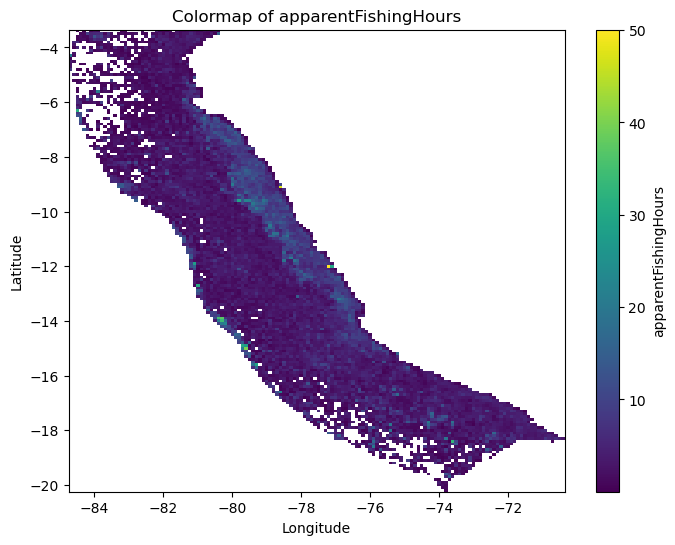

In [23]:
ds_with_clusters = ds_final.mean(dim='date')#.sel(cluster=np.nan).plot()
# Step 1: Extract the data (assuming data has 'lon' and 'lat' coordinates)
data = ds_with_clusters['apparentFishingHours']

# Mask out NaN values or missing data
data = data.where(~np.isnan(data))

# Step 2: Extract latitudes, longitudes, and values for plotting
lon = data['lon'].values
lat = data['lat'].values

values = np.transpose(data.values)

# Step 3: Plot using pcolormesh (to preserve lat/lon grid)
plt.figure(figsize=(8, 6))
plt.pcolormesh(lon, lat, values, cmap='viridis', shading='auto')
plt.colorbar(label=f"apparentFishingHours")
plt.title(f"Colormap of apparentFishingHours")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
df_with_clusters = ds_with_clusters.to_dataframe().reset_index()

In [45]:
df_with_clusters = df_with_clusters.dropna(subset=['apparentFishingHours'])

<Axes: xlabel='lon', ylabel='lat'>

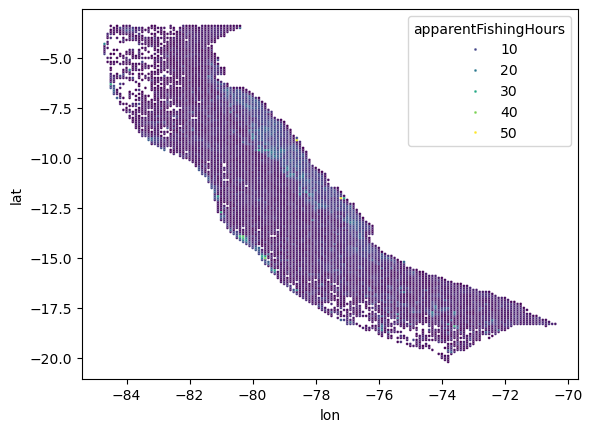

In [46]:
sns.scatterplot(data=df_with_clusters, x='lon', y='lat', hue='apparentFishingHours', palette='viridis', s=4)